<a href="https://colab.research.google.com/github/SiddTayi/Internship/blob/main/TASK3_try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [100]:
df = pd.read_csv('stock_sentiment.csv')
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [101]:
df.shape

(5791, 2)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [103]:
df.isna().sum()

Text         0
Sentiment    0
dtype: int64

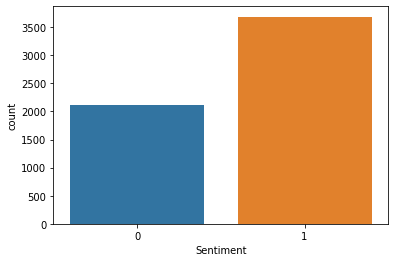

In [104]:
sb.countplot(df['Sentiment'])

# Data Cleaning

In [105]:
df["text"] = df["Text"].str.lower()
df['text'] = df['text'].astype(str)
df['text'].head()

0    kickers on my watchlist xide tit soq pnk cpw b...
1    user: aap movie. 55% return for the fea/geed i...
2    user i'd be afraid to short amzn - they are lo...
3                                    mnta over 12.00  
4                                     oi  over 21.37  
Name: text, dtype: object

In [106]:
df.head()

,Text,Sentiment,text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37


In [107]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 1982),
 ('to', 1809),
 ('a', 1367),
 ('on', 1081),
 ('in', 1004),
 ('of', 976),
 ('for', 936),
 ('aap', 884),
 ('and', 872),
 ('is', 839)]

In [108]:
new_df = df.drop('Text',axis=1)
cols = new_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df = new_df[cols]
new_df.size

11582

In [109]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
import re
import nltk 

from nltk.corpus import stopwords


In [110]:
nltk.download()
", ".join(stopwords.words('english'))

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [111]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [112]:
df["text_wo_stop"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,Text,Sentiment,text,text_wo_stop
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user: aap movie. 55% return fea/geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user i'd afraid short amzn - looking like near...
3,MNTA Over 12.00,1,mnta over 12.00,mnta 12.00
4,OI Over 21.37,1,oi over 21.37,oi 21.37


In [113]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text_wo_stop'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [114]:
corpus

['kicker watchlist xide tit soq pnk cpw bpz aj trade method method see prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user afraid short amzn looking like near monopoly ebooks infrastructure service',
 'mnta',
 'oi',
 'pgnx',
 'aap user current downtrend break otherwise short term correction med term downtrend',
 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 'assuming fcx open tomorrow trigger buy still much like setup',
 'really worry everyone expects market rally usually exact opposite happens every time shall see soon bac spx jpm',
 'aap gamco arry haverty apple extremely cheap great video',
 'user maykiljil posted agree msft going higher possibly north',
 'momentum coming back etfc broke resistance solid volume friday ong set',
 'ha hitting mean resume targeting level',
 'user gameplan shot today liked trend break may c h break oc weekly tren

In [115]:
df['text_wo_links'] = df['text_wo_stop'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df.head()

,Text,Sentiment,text,text_wo_stop,text_wo_links
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers watchlist xide tit soq pnk cpw bpz aj ...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user: aap movie. 55% return fea/geed indicator...,user: aap movie. 55% return fea/geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user i'd afraid short amzn - looking like near...,user i'd afraid short amzn - looking like near...
3,MNTA Over 12.00,1,mnta over 12.00,mnta 12.00,mnta 12.00
4,OI Over 21.37,1,oi over 21.37,oi 21.37,oi 21.37


In [116]:
# emoticons = {
#     ":-(": "SAD", ":(": "SAD", ":-|": "SAD", 
#     ";-(": "SAD", ";-<": "SAD", "|-{": "SAD",
#     ":-)": "HAPPY",":)": "HAPPY", ":o)": "HAPPY",
#     ":-}": "HAPPY", ";-}": "HAPPY", ":->": "HAPPY",
#     ";-)": "HAPPY"
# }

EMOTICONS = {

    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(_;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"\(\.\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\\^_\^\）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\\^\.\^\\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~":"Waving",
    u"\(\^\.\^\)/~":"Waving",
    u"\(-_-\)/~ \($\·\·\)/~":"Waving",
    u"\(T_T\)/~":"Waving",
    u"\(ToT\)/~":"Waving",
    u"\(\\^0\^\\)":"Excited",
    u"\(\_\\)":"Amazed",
    u"\(\_\;":"Amazed",
    u"\(\+\+\) \(@@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def remove_emoticons(text):
  for emot in EMOTICONS:
    text = re.sub(u'('+emot+')','_'.join(EMOTICONS[emot].replace(',',"").split()),text)
  return text
df['text_wo_emo'] = df['text_wo_links'].apply(lambda text:remove_emoticons(text))



In [117]:
remove_emoticons('AXA Here is my tip of the day. Buy now! You do not even have to sign up for a newsletter or anything O If I\'m wrong I will eat crow :)')

"AXA Here is my tip of the day. Buy now! You do not even have to sign up for a newsletter or anything O If I'm wrong I will eat crow Happy_face_or_smiley"

In [118]:
df.head()

,Text,Sentiment,text,text_wo_stop,text_wo_links,text_wo_emo
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers watchlist xide tit soq pnk cpw bpz aj ...,kickers watchlist xide tit soq pnk cpw bpz aj ...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,user: aap movie. 55% return fea/geed indicator...,user: aap movie. 55% return fea/geed indicator...,user: aap movie. 55% return fea/geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...,user i'd afraid short amzn - looking like near...,user i'd afraid short amzn - looking like near...,user i'd afraid short amzn - looking like near...
3,MNTA Over 12.00,1,mnta over 12.00,mnta 12.00,mnta 12.00,mnta 12.00
4,OI Over 21.37,1,oi over 21.37,oi 21.37,oi 21.37,oi 21.37


In [119]:
df.drop(columns=['Text', 'text_wo_stop','text_wo_links'])

,Sentiment,text,text_wo_emo
0,1,kickers on my watchlist xide tit soq pnk cpw b...,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,1,user: aap movie. 55% return for the fea/geed i...,user: aap movie. 55% return fea/geed indicator...
2,1,user i'd be afraid to short amzn - they are lo...,user i'd afraid short amzn - looking like near...
3,1,mnta over 12.00,mnta 12.00
4,1,oi over 21.37,oi 21.37
...,...,...,...
5786,0,industry body cii said #discoms are likely to ...,industry body cii said #discoms likely suffer ...
5787,0,"#gold prices slip below rs 46,000 as #investor...","#gold prices slip rs 46,000 #investors book pr..."
5788,1,workers at bajaj auto have agreed to a 10% wag...,workers bajaj auto agreed 10% wage cut period ...
5789,1,"#sharemarket live: sensex off day’s high, up 6...","#sharemarket live: sensex day’s high, 600 poin..."


##Model Training

In [120]:
from sklearn.model_selection import train_test_split

x = df.text_wo_emo
y = df.Sentiment

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=55)
print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

x_train: 4632
x_test: 1159
y_train: 4632
y_test: 1159


##Logistic Regression

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
lr = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [122]:
model = Pipeline([('vectorizer',tvec), ('classifier', lr)])
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [123]:
from sklearn.metrics import confusion_matrix
preds = model.predict(x_test)
confusion_matrix(preds, y_test)

array([[211,  56],
       [208, 684]])

##Model Prediction

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(preds, y_test))
print("Precision: ", precision_score(preds, y_test, average='weighted'))
print("Recall:", recall_score(preds, y_test, average='weighted'))

Accuracy:  0.7722174288179465
Precision:  0.8273970185959165
Recall: 0.7722174288179465


#Random Forest Model

##TFIDF

In [125]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
# x_bow = cv.fit_transform(corpus).toarray()

In [126]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=5000,ngram_range=(2,2))

# feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics


model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)


In [128]:
#rint('f1_score :',f1_score(y_test,y_pred))
print('recall score :',recall_score(y_test,y_pred))
print('precision score :',precision_score(y_test,y_pred))
print('accuracy score :',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

recall score : 0.8811475409836066
precision score : 0.7304643261608154
accuracy score : 0.719585849870578
[[189 238]
 [ 87 645]]
